# Graphiken individuell gestalten

Im vorherigen Kapitel zur [Visualisierung](../../chapter02_basics/visualization/visualization.ipynb) haben Sie bereits die Grundlagen kennengelernt um mit Matplotlib Diagramme und Graphiken in Python zu erstellt. Außderdem haben Sie bereits die wichtigsten Elemente eines Diagramms kennengelernt – etwa Achsen, Linien und einfache Beschriftungen. In diesem Kapitel vertiefen Sie Ihre Kenntnisse und wir zeigen Ihnen, wie Sie Plots gezielt anpassen können, um Informationen klarer darzustellen und die Lesbarkeit Ihrer Grafiken zu verbessern.

Insbesondere lernen Sie, wie Sie zentrale Eigenschaften von Linien und anderen Diagramm-Elementen direkt beim Aufruf der $\texttt{plt.plot()}$-Funktion festlegen. Dies ist hilfreich, um etwa die Linienbreite, Farbe oder den Linienstil anzupassen.

## $\texttt{plt.plot()}$-Eigenschaften anpassen

Viele Eigenschaften von Diagramm-Elementen können direkt über optionale Argumente an die $\texttt{plt.plot()}$-Funktion (und ähnliche Funktionen) übergeben werden. Der allgemeine Aufbau ist wie folgt:

$$
\texttt{plt.plot(x, y, Property1=Value1, Property2=Value2, ...)}.
$$

Dabei handelt es sich bei $\texttt{Property1}$ und $\texttt{Property2}$ um sogenannte *Keyword-Argumente*, also benannte Parameter. Die Eigenschaftsnamen (wie z. B. $\texttt{linewidth}$) werden als Schlüssel angegeben und die zugehörigen Werte werden direkt mit übergeben.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y, linewidth=2, linestyle='--', color='red')

plt.title("Sinuskurve mit individuellen Eigenschaften")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.show()

Hier werden drei Eigenschaften gleichzeitig gesetzt:

- $\texttt{linewidth=2}$: Die Linie wird doppelt so dick wie der Standard gezeichnet.
- $\texttt{linestyle='--'}$: Die Linie erscheint gestrichelt.
- $\texttt{color='red'}$: Die Farbe der Linie wird auf Rot gesetzt.

Auf diese Weise können Sie viele Details Ihrer Visualisierungen direkt beim Erstellen des Diagramms festlegen.


Wie auch im Kapitel zu [for-Schleifen](../../chapter02_basics/programmablaeufe/for_loops.ipynb) verwenden wir wieder den realen Datensatz zum Energieverbrauch verschiedener Länder der Platform [Our World in Data](https://ourworldindata.org/). Wir sind dabei primär an der Entwicklung des prozentualen Anteils erneuerbarer Energien am Gesamtenergieverbrauch interessiert.

In [ ]:
import pandas as pd
import numpy as np

# Datenquelle
url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

# Auswahlparameter
countries = ['Germany', 'United States', 'China', 'Norway', 'Brazil']
variable = 'renewables_share_energy'

# Daten filtern und auf relevante Spalten reduzieren
df_filtered = df[(df['country'].isin(countries)) & (df['year'] >= 1990)]
df_pivot = df_filtered.pivot(index='year', columns='country', values=variable)

# Nur vollständige Zeilen und relevante Länder
df_selected = df_pivot[countries].dropna()

# Jahr als eigene Spalte
df_selected_with_years = df_selected.copy()
df_selected_with_years.insert(0, 'year', df_selected.index)

# Umwandeln in NumPy-Array
data_array = df_selected_with_years.to_numpy()

Auch hier gilt wieder: Sie müssen die Aufbereitung der Rohdaten nicht nachvollziehen. Es ist nur wichtig, das Sie mit den Daten arbeiten können. Wir betrachten die Entwicklung von fünf Länder, Deutschland, USA, China, Norwegen und Brasilien, über den Zeitraum 1990 bis 2023. Allerdings haben die Ihnen zur Verfügung gestellten Daten im Vergleich zum Kapitel zu [for-Schleifen](https://www.youtube.com/watch?v=dQw4w9WgXcQ) eine leicht andere Struktur.

- $\texttt{data_array}$: Numpy-Array, der Größe $ 33 \times 6$, wobei
    - die Spalte 0 die Jahres Zahlen enthält, und
    - die Spalten 1 bis 5 den Anteil erneuerbarer Energien in Prozent für Deutschland, USA, China, Norwegen und Brasilien (in genau dieser Reihenfolge) enthalten.

Um ein Gefühl für den Aufbau des Datensatzes zu bekommen, können Sie sich beispielhaft die ersten fünf Zeilen des Arrays anzeigen lassen.


In [ ]:
# Schöne Ausgabe
np.set_printoptions(precision=1, suppress=True)

# Beispielhafte Ausgabe der ersten 5 Zeilen
print(data_array[:5])

Das Ziel ist es die Entwicklung der erneuerbaren Energien über die Jahre hinweg länderübergreifend zu analysieren und zu vergleichen.
Wir visulaisieren zu nächst exemplarisch die Daten für Deutschland.

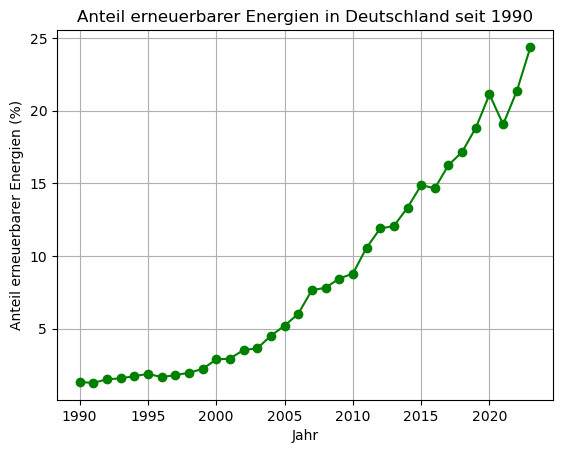

In [ ]:
# Einfacher Plot mit Markern für die Datenpunkte
plt.plot(data_array[:, 0], data_array[:, 1], color='green', marker='o')

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()

In dieser Graphik wurde zusätzlich ein *Marker* gesetzt, der die einzelnen Datenpunkte durch kleine Kreise sichtbar macht ($\texttt{marker='o'}$). Das hilft dabei, die zugrunde liegenden Messwerte klarer zu erkennen.

In den folgenden Aufgaben lernen Sie, wie Sie das Erscheinungsbild der Graphik Schritt für Schritt individuell anpassen können.

:::{admonition} Aufgabe 1.1
Wiederholen Sie den $\texttt{plt.plot()}$-Befehl aus dem vorherigen Abschnitt und verwenden Sie dabei eine durchgezogene Linie mit runden Markierungen. Achten Sie diesmal darauf, dass die die Größe der Markierungen ($\texttt{markersize})$ 10 entspricht.
:::

In [ ]:
# Ihr Code 

:::{admonition} Hinweis
:class: note dropdown

Sie können mehrere Eigenschaften gleichzeitig setzen, indem Sie mehrere Paare von Eigenschaftsnamen und Werten angeben: 

$$
\texttt{plot(x, y, marker='o', linestyle='-', markersize=50)}.
$$

Die Größe der Markierungen kann über das Argument $\texttt{markersize}$ gesteuert werden.
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
plt.plot(data_array[:, 0], data_array[:, 1], color='green', 
         marker='o', linestyle='-', markersize=10)

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()
```
:::

Wie Sie sehen, lassen sich mehrere Darstellungsoptionen gleichzeitig angeben, indem Sie jeweils ein Paar aus Eigenschaftsname und -wert übergeben. Dabei gelten folgende Regeln:

- Die Eigenschaften können in beliebiger Reihenfolge angegeben werden.
- Auf jeden Eigenschaftsnamen muss unmittelbar der zugehörige Wert folgen.
- Diese Name-Wert-Paare stehen am Ende der Argumentliste des Befehls.

:::{admonition} Aufgabe 1.2
Stellen Sie die Daten mit einer durchgezogenen Linie, runden Markierungen der Größe 10 und einer blauen Füllfarbe der Marker dar. Verwenden Sie dazu die $\texttt{markerfacecolor}$-Eigenschaft.
:::

In [ ]:
# Ihr Code 

:::{admonition} Lösung
:class: tip dropdown

``` python
# Plot mit Markergröße 10 und grüner Markerfüllung
plt.plot(data_array[:, 0], data_array[:, 1], color='green', 
         marker='o', linestyle='-', markersize=10, 
         markerfacecolor='blue')

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()
```
:::


Sie können also eine Vielzahl an Darstellungsoptionen anpassen – nicht nur durch $\texttt{marker}$, $\texttt{linestyle}$ und $\texttt{color}$, sondern auch weitere Eigenschaften.

Besonders häufig verwendete Optionen für Linienplots sind:
- $\texttt{linewidth}$: Dicke der Linie und der Markerränder
- $\texttt{markersize}$: Größe der Markersymbole
- $\texttt{markeredgecolor}$: Farbe des Markerrands
- $\texttt{markerfacecolor}$: Farbe des Markerinneren

Verschiedene Diagrammtypen und Objekte besitzen jeweils unterschiedliche Eigenschaften, die angepasst werden können. Anstatt sich alle verfügbaren Optionen einzuprägen, empfiehlt es sich, bei Bedarf einen Blick in die offizielle Dokumentation zu werfen:[Matplotlib Line2D properties](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html). 

Als praktische Hilfe finden Sie hier außerdem eine kompakte Übersicht über die wichtigsten Darstellungsoptionen, die Sie bereits kennengelernt haben – ergänzt um weitere häufig genutzte Einstellungen.

:::{list-table}
:header-rows: 1
:widths: 25 50 25

* - Eigenschaft
  - Beschreibung
  - Beispiel
* - $\texttt{color}$
  - Linienfarbe (z. B. $\texttt{r}$ für rot, $\texttt{b}$ für blau, $\texttt{g}$ für grün)
  - $\texttt{color='g'}$
* - $\texttt{marker}$
  - Markersymbol (z. B. $\texttt{o}$ für Kreis, $\texttt{s}$ für Quadrat, $\texttt{x}$ für Kreuz)
  - $\texttt{marker='o'}$
* - $\texttt{markersize}$
  - Größe der Marker
  - $\texttt{markersize=10}$
* - $\texttt{markerfacecolor}$
  - Füllfarbe der Marker
  - $\texttt{markerfacecolor='green'}$
* - $\texttt{markeredgecolor}$
  - Randfarbe der Marker
  - $\texttt{markeredgecolor='black'}$
* - $\texttt{linewidth}$
  - Dicke der Linie und Markerränder
  - $\texttt{linewidth=2.5}$
* - $\texttt{linestyle}$
  - Linienstil (z. B. $\texttt{-}$, $\texttt{--}$, $\texttt{:}$, $\texttt{-.}$)
  - $\texttt{linestyle='--'}$
* - $\texttt{label}$
  - Legendentext für diese Linie
  - $\texttt{label='Deutschland'}$
* - $\texttt{alpha}$
  - Transparenz (zwischen 0 und 1)
  - $\texttt{alpha=0.7}$
* - $\texttt{visible}$
  - Blendet die Linie aus, ohne sie zu löschen
  - $\texttt{visible=False}$
* - $\texttt{dash_capstyle}$
  - Form der Enden gestrichelter Linien ($\texttt{butt}$, $\texttt{round}$, $\texttt{projecting}$)
  - $\texttt{dash_capstyle='round'}$
:::



:::{admonition} Aufgabe 1.3
Nutzen Sie das folgende Diagramm als Ausgangspunkt und passen Sie es durch gezielte Verwendung von $\texttt{plt.plot()}$-Eigenschaften an. Ziel ist es, ein besseres Gefühl für die vielfältigen Gestaltungsmöglichkeiten von Linienplots zu entwickeln.
:::

In [ ]:
# Einfacher Plot mit Markern für die Datenpunkte
plt.plot(data_array[:, 0], data_array[:, 1])

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()

Bei der Darstellung mehrerer Graphen ist es wichtig die Graphen auch farblich zu unterscheiden - ähnlich wie beim Hervorheben wichtiger Informationen.
Farben machen Unterschiede sichtbar und helfen Zusammenhänge auf einen Blick zu erfassen. Deshalb schauen wir uns nun die Farbangaben in Matplotlib an. Für acht häufig verwendete Farben können Sie entweder den vollständigen Farbnamen oder einen einzelne Buchstabe verwenden:

:::{list-table}
:header-rows: 1
:widths: 20 40 20

* - Farbe
  - Name
  - Abkürzung
* - Rot
  - $\texttt{red}$
  - $\texttt{r}$
* - Grün
  - $\texttt{green}$
  - $\texttt{g}$
* - Blau
  - $\texttt{blue}$
  - $\texttt{b}$
* - Schwarz
  - $\texttt{black}$
  - $\texttt{k}$
* - Magenta
  - $\texttt{magenta}$
  - $\texttt{m}$
* - Gelb
  - $\texttt{yellow}$
  - $\texttt{y}$
* - Cyan
  - $\texttt{cyan}$
  - $\texttt{c}$
* - Weiß
  - $\texttt{white}$
  - $\texttt{w}$
:::


Diese Farbangaben können sowohl für $\texttt{color}$ als auch für $\texttt{markerfacecolor}$ und $\texttt{markeredgecolor}$ verwendet werden.


:::{admonition} Aufgabe 1.4
Stellen Sie die Daten aus Aufgabe 1.3 erneut dar – diesmal mit einer schwarzen Linie.
:::

In [ ]:
# Ihr Code 


:::{admonition} Hinweis
:class: note dropdown

Die Linienfarbe lässt sich entweder mit Farbnamen wie $\texttt{'black'}$ oder mit Kurzformen wie $\texttt{'k'}$ festlegen.
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
plt.plot(data_array[:, 0], data_array[:, 1], color='k')

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()
```
:::

Neben den acht Grundfarben können Sie auch aus über zehn Millionen weiteren Farben wählen, indem Sie sogenannte *RGB-Farbwerte* angeben. Ein RGB-Wert besteht aus drei Zahlen zwischen 0 und 1, die den *Anteil von Rot, Grün und Blau* in der gewünschten Farbe bestimmen. 
Um eine Farbe auf diese Weise festzulegen, übergeben Sie ein Tupel mit drei Werten an das Argument $\texttt{color}$, zum Beispiel 
$$\texttt{color=(0.5, 0.6, 0)}.$$

:::{admonition} Aufgabe 1.5
Stellen Sie die Daten aus Aufgabe 1.3 erneut dar, aber diesmal mit einer benutzerdefinierten Farbe, die durch das RGB-Tupel $(0.5, 0.6, 0)$ definiert ist.
:::

In [ ]:
# Ihr Code 


:::{admonition} Hinweis
:class: note dropdown

RGB-Farben bestehen aus drei Werten zwischen 0 und 1. Verwenden Sie die folgende Syntax, um eine Farbe per RGB anzugeben: 

$$
\texttt{plt.plot(x, y, color=(0.2, 0.2, 0.2))}.
$$
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
plt.plot(data_array[:, 0], data_array[:, 1], color=(0.5, 0.6, 0))

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()
```
:::

Farben lassen sich sowohl über Abkürzungen wie $\texttt{'r'}$ oder über ein RGB-Tupel angegeben. Beide Varianten können für verschiedene Farbeigenschaften kombiniert werden.

:::{admonition} Aufgabe 1.6
Stellen Sie die Daten so dar, dass eine durchgezogene Linie mit der Farbe $\texttt{(0.6, 0.2, 0.8)}$ verwendet wird und die Kreis-Marker eine Randfarbe in Cyan haben.
:::

In [ ]:
# Ihr Code 


:::{admonition} Hinweis
:class: note dropdown

Nutzen Sie $\texttt{'o-'}$ für eine durchgezogene Linie mit Kreis-Markern. Die Linienfarbe setzen Sie über $\texttt{color}$, die Randfarbe der Marker über $\texttt{markeredgecolor}$.
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
plt.plot(data_array[:, 0], data_array[:, 1], 'o-', 
         color=(0.6, 0.2, 0.8), 
         markeredgecolor='c')

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()
```
:::

Im letzten Diagramm hatten Linie und Markerrand unterschiedliche Farben. Kann man auch die Innenfarbe der Marker verändern?

:::{admonition} Aufgabe 1.7
Stellen Sie die Daten erneut wie in Aufgabe 1.6 dar. Verwenden Sie diesmal das Argument $\texttt{markerfacecolor}$ anstelle von $\texttt{markeredgecolor}$.
:::

In [ ]:
# Ihr Code 


:::{admonition} Hinweis
:class: note dropdown

Ersetzen Sie $\texttt{markeredgecolor}$ durch $\texttt{markerfacecolor}$, um die Innenfläche der Marker zu färben.
:::

:::{admonition} Lösung
:class: tip dropdown

``` python
plt.plot(data_array[:, 0], data_array[:, 1], 'o-',
         color=(0.6, 0.2, 0.8),
         markerfacecolor='c')

plt.title('Anteil erneuerbarer Energien in Deutschland seit 1990')
plt.xlabel('Jahr')
plt.ylabel('Anteil erneuerbarer Energien (%)')
plt.grid(True)
plt.show()
```
:::